In [36]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [19]:
def get_rounds(data_list):
    res = []
    for data in data_list:
        rounds_count = 0
        for battle in data:
            Flag = True
            for operation in battle["rounds"][-1]["operation_history"]:
                if operation["operation"]=="run":
                    Flag = False
            if Flag:
                rounds_count+=1
        res.append(rounds_count)
    return res

In [13]:
def get_sub_battle(data_list):
    res = []
    for data in data_list:
        battle_count = 0
        for battle in data:
            for op in battle["rounds"][-1]["operation_history"]:
                if op["operation"] !="run":
                    battle_count += 1
        res.append(battle_count)
    return res

In [21]:
def token_distribution(data_list):
    token_list=[]
    for data in data_list:
        for battle in data:
            token_list.append(battle["total_usage_token"])
    token_array=np.array(token_list)
    mean = np.mean(token_array)
    sigma = np.std(token_array,ddof=1)

    x = np.linspace(mean - 3 * sigma, mean + 3 * sigma, 100)
    pdf = norm.pdf(x, loc=mean, scale=sigma)
    bins = np.linspace(min(token_list), max(token_list), 10)
    counts, bin_edges = np.histogram(token_list, bins=bins)
    
    plt.hist(token_list, bins=bins, color='g', alpha=0.6, label='Histogram')
    pdf_counts = pdf * (bin_edges[1] - bin_edges[0]) * len(token_list)
    plt.plot(x, pdf_counts, color='r', label='Estimated Normal Distribution')
    
    plt.xlim(min(token_list), max(token_list))
    plt.xlabel("$token$")
    plt.ylabel("$counts$")
    plt.legend(loc="best")
    plt.show()


In [15]:
def single_operation_distribution(data):
    user_input = input()
    count=0
    for battle in data:
        for operation in battle["rounds"][-1]["operation_history"]:
            if operation["operation"] == user_input:
                count+=1
    return user_input,count

In [28]:
def operation_distribution(data,count_lists,fig, ax):
    operation_counts = {}
    unit_topics=["Cave","","","",""]
    for i in data:
        countlist = []
        user_input, count = single_operation_distribution(i)
        countlist.append(count)
        count_lists.append(countlist)
        operation_counts[user_input]=countlist
    
    name_lists=list(operation_counts)
    print(name_lists)
    
    bottom_2 = np.add(count_lists[0], count_lists[1])
    bottom_3 = np.add(bottom_2, count_lists[2])
    bottom_4 = np.add(bottom_3, count_lists[3])

    # create plot here
    ax.bar(range(len(count_lists[0])), count_lists[0], color="#D6E3B7",label=name_lists[0])
    ax.bar(range(len(count_lists[1])), count_lists[1], bottom = count_lists[0], color="#95A96A",label=name_lists[1])
    ax.bar(range(len(count_lists[2])), count_lists[2], bottom = bottom_2, color="#869E7A",label=name_lists[2])
    ax.bar(range(len(count_lists[3])), count_lists[3], bottom = bottom_3, color="#45602D",label=name_lists[3])
    ax.bar(range(len(count_lists[4])), count_lists[4], bottom = bottom_4, color="#AB9A6F",label=name_lists[4])
    ax.set_xticks(range(len(name_lists)))
    ax.set_xticklabels(unit_topics)
    ax.set_title("Counts Distribution")
    ax.set_xlabel("Fighting Place")
    ax.set_ylabel("Counts")
    ax.legend()
    ax.show()
        
    

KeyboardInterrupt: Interrupted by user

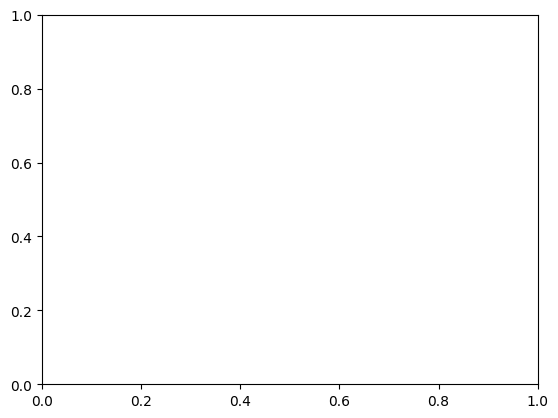

In [31]:
fig=plt.figure()
ax=fig.subplots()
count_lists=[]
data_list=[]
for i in range(5):
    user_path = input()
    file_path = Path(user_path).resolve()
    if not file_path.exists():
        print("The file does not exist.")
        exit(0)
    with open(file_path, "r", encoding="utf-8") as file:
        data_list.append((json.loads(file.read())))
print("The number of operation(without runaway):",get_sub_battle(data_list))
print("The number of valid run:",get_rounds(data_list))
token_distribution(data_list)
operation_distribution(data_list,count_lists,fig,ax)